In [21]:
from scipy.stats import norm
from scipy.stats import t
import numpy as np
import pandas as pd
from numpy.random import seed
import matplotlib.pyplot as plt
import seaborn as sns

waze_cleaned = pd.read_csv("../data/waze_cleaned.csv")

In [22]:
waze_cleaned.head()

,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android


**Univariate analysis**

In [23]:
waze_cleaned.describe()

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000
mean,80.623820,67.255822,189.547409,1751.822505,121.747395,29.638296,4044.401535,1864.199794,15.544653,12.182530
std,80.736502,65.947295,136.189764,1008.663834,147.713428,45.350890,2504.977970,1448.005047,9.016088,7.833835
min,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,23.000000,20.000000,90.457733,878.500000,10.000000,0.000000,2217.319909,840.181344,8.000000,5.000000
50%,56.000000,48.000000,158.718571,1749.000000,71.000000,9.000000,3496.545617,1479.394387,16.000000,12.000000
75%,111.000000,93.000000,253.540450,2627.500000,178.000000,43.000000,5299.972162,2466.928876,23.000000,19.000000
max,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


Should I consider renaming the "label" column to "churn" or something similar? Should I convert to boolean?


In [ ]:
#convert label column datatype to boolean

#df_indexed_bool = df_indexed['label'].apply(lambda x: True if x == 'churned' else False)
#Ended up not using this, could convert if necessary. 

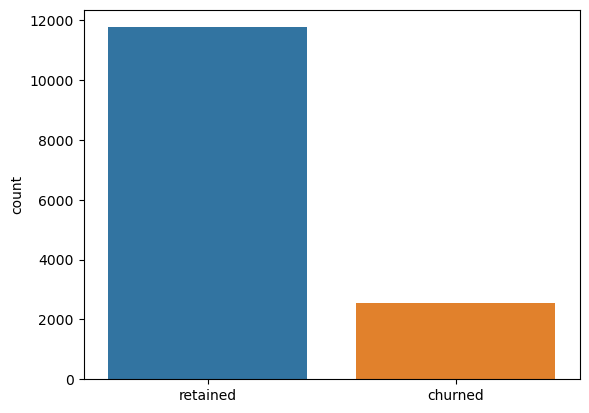

In [33]:
sns.countplot(x = waze_cleaned["label"])
plt.xlabel("");

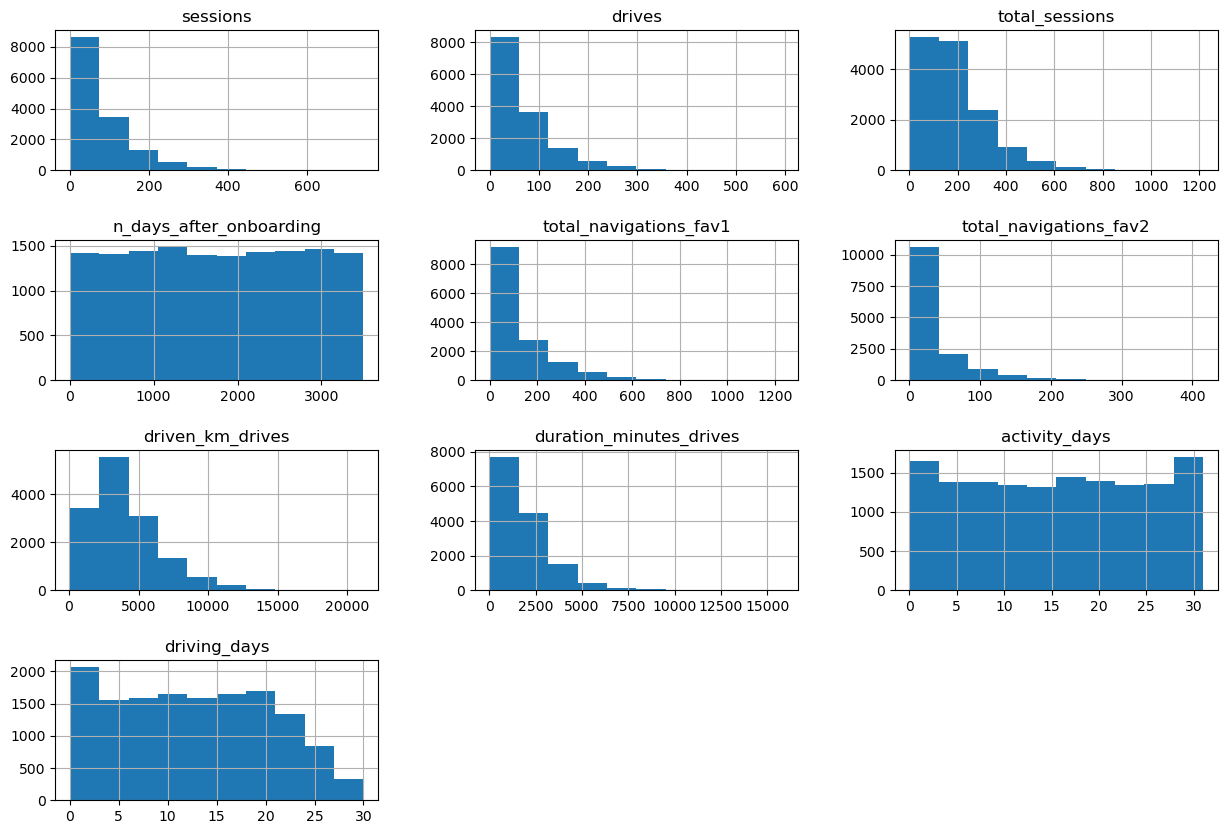

In [24]:
waze_cleaned.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);

I know this boxplot with a shared y axis doesn't work because of relatively extreme value ranges in a couple feautures. Is it reasonable to examine boxplots of all columns to check for outliers? If so, how should I approach the plots?

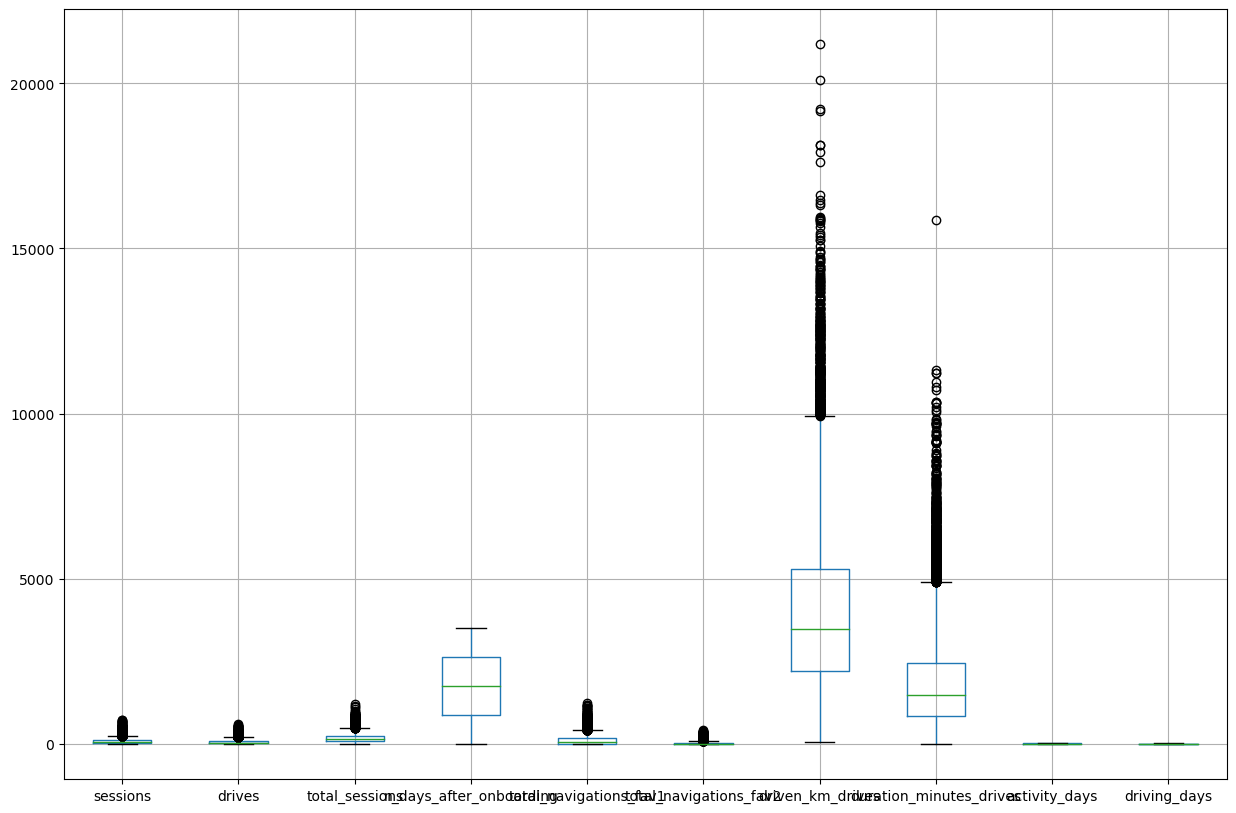

In [26]:
waze_cleaned.boxplot(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);

**Bivariate analysis** seaborn facetgrid of scatterplots to compare features. And heatmap. And look at Pearson's r values? 